# INTRODUCTION TO NLP

In [2]:
# SESSION 1 AND 2

In [ ]:
# pip install spacy
# import spacy
# from spacy.lang.en.examples import sentences
# pip install en_core_web_sm
# !python -m spacy download en_core_web_sm

In [59]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#  creating a new instance of a blank English language model
nlp=spacy.load('en_core_web_sm')

In [61]:
type(nlp)

spacy.lang.en.English

In [62]:
# creates a structured document object
doc1=nlp('India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a supportive Government. A huge population, mostly comprising the youth, is a strong driver for demand and an ample source of manpower.')

In [63]:
type(doc1)

spacy.tokens.doc.Doc

## CREATE A DATAFRAME:

In [458]:
text_s=nlp('We calculate the similarities between documents using the sim object and print the resulting similarity matrix. In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter. For example, setting num_best=1 will return the document with the highest similarity score.')

In [472]:
import pandas as pd

# Initialize an empty list to store the sentences
sentences = []

# Loop over each sentence in the document
for i, sent in enumerate(text_s.sents):
    # Append the sentence number and sentence text to the list
    sentences.append({'Sentence Number': i+1, 'Sentence Text': sent.text})

# Convert the list to a pandas DataFrame
sent_df = pd.DataFrame(sentences)

# Print the resulting DataFrame
print(sent_df)


   Sentence Number                                      Sentence Text
0                1  We calculate the similarities between document...
1                2  In this case, the output will be a 4x4 matrix,...
2                3  Note that MatrixSimilarity can be used with ot...
3                4  For example, setting num_best=1 will return th...


In [ ]:
## OR ###

In [459]:
type(text_s)

spacy.tokens.doc.Doc

In [475]:
doc_list = list(nlp.pipe([text_s]))
for doc1 in doc_list:
    for sentence in doc1.sents:
        print(sentence.text)

We calculate the similarities between documents using the sim object and print the resulting similarity matrix.
In this case, the output will be a 4x4 matrix, where each element represents the cosine similarity between two documents.
Note that MatrixSimilarity can be used with other similarity measures besides cosine similarity by specifying a different num_best parameter.
For example, setting num_best=1 will return the document with the highest similarity score.


In [476]:
# converting doc into a DF of sentences
# Create a list of sentences from the doc
sentences = [sent.text for sent in doc1.sents]

# Create a dictionary with the sentences as values and their indices as keys
data = {'sentence': sentences}

# Convert the dictionary to a pandas DataFrame
sent_df = pd.DataFrame.from_dict(data, orient='columns')

# Print the resulting DataFrame
print(sent_df)

token = []
pos = []
new_sent_df = sent_df
for sent in nlp.pipe(new_sent_df['sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
        
print(token)
print(pos)

new_sent_df['Token']=token
new_sent_df['POS']=pos

new_sent_df


data = new_sent_df['sentence']

                                            sentence
0  We calculate the similarities between document...
1  In this case, the output will be a 4x4 matrix,...
2  Note that MatrixSimilarity can be used with ot...
3  For example, setting num_best=1 will return th...
[['We', 'calculate', 'the', 'similarities', 'between', 'documents', 'using', 'the', 'sim', 'object', 'and', 'print', 'the', 'resulting', 'similarity', 'matrix', '.'], ['In', 'this', 'case', ',', 'the', 'output', 'will', 'be', 'a', '4x4', 'matrix', ',', 'where', 'each', 'element', 'represents', 'the', 'cosine', 'similarity', 'between', 'two', 'documents', '.'], ['Note', 'that', 'MatrixSimilarity', 'can', 'be', 'used', 'with', 'other', 'similarity', 'measures', 'besides', 'cosine', 'similarity', 'by', 'specifying', 'a', 'different', 'num_best', 'parameter', '.'], ['For', 'example', ',', 'setting', 'num_best=1', 'will', 'return', 'the', 'document', 'with', 'the', 'highest', 'similarity', 'score', '.']]
[['PRON', 'VERB', 'DET', '

In [477]:
data

0    We calculate the similarities between document...
1    In this case, the output will be a 4x4 matrix,...
2    Note that MatrixSimilarity can be used with ot...
3    For example, setting num_best=1 will return th...
Name: sentence, dtype: object

In [ ]:
############

### TOKENIZATION

Tokenization is a fundamental task in natural language processing that involves splitting text into individual words or tokens. We tokenize text in order to make it easier to process and analyze, since we can then treat each token as a separate unit of meaning.

In summary, tokenization is a key preprocessing step in many natural language processing tasks that involves breaking down text into smaller, more manageable units. By doing so, we can more easily analyze and manipulate text, and prepare it for further processing and analysis.

In [64]:
for token in doc1:
    print(token)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

### Number of tokens

In [65]:
# Count the number of tokens

t_count=0
for token in doc1:
    t_count=t_count+1
    print(token)
print('The no of tokens:',t_count)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

In [66]:
len(doc1)

201

In [67]:
doc1[0]

India

In [68]:
doc1[:-1]

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

### STOP WORDS

In [69]:
# STOP WORDS:
from spacy.lang.en.stop_words import STOP_WORDS

In [70]:
print(STOP_WORDS)

{'how', 'so', 'hundred', 'a', 'on', 'has', "'d", 'else', 'seem', 'are', 'becoming', 'formerly', 'now', 'anyhow', 'name', 'eight', 'which', 'namely', 'noone', 'although', 'anyone', 'these', 'the', 'nowhere', 'thru', '‘re', 'she', 'because', 'your', 'into', 'unless', "n't", 'last', 'does', 'empty', 'nothing', 'before', 'four', 'us', 'together', 'still', 'hence', 'beyond', '‘ve', '’d', 'that', 'show', 'this', 'behind', 'too', '’ve', 'them', 'might', 'give', 'just', 're', 'became', 'becomes', 'quite', 'everywhere', 'n’t', 'meanwhile', 'myself', 'twelve', 'could', 'somehow', 'put', 'herein', 'go', 'off', 'all', 'indeed', 'between', 'do', 'few', 'keep', 'above', 'towards', 'whither', 'can', 'seemed', 'you', 'become', 'only', 'forty', 'along', 'than', 'more', 'one', 'below', 'whom', 'whole', 'seems', 'with', 'side', 'since', 'moreover', 'where', 'besides', 'their', 'those', 'may', 'former', 'no', 'latter', 'yourselves', 'during', 'anything', 'or', 'will', 'sometime', 'whether', 'ever', 'whenc

In [71]:
len(STOP_WORDS)

326

### Is it a stop word?

In [72]:
# Is it a stop word
for token in doc1:
    print(token,'==>',token.is_stop)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

In [104]:
# Find the no of stop words tokens in the doc1

stop_count=0
for token in doc1:
    if token.is_stop==True:
        print(token)
        stop_count=stop_count+1
print('The count of non-stop word tokens:',stop_count)

a
is
the
by
the
most
with
over
and
the
most
in
the
of
an
and
The
its
in
its
and
hence
has
itself
to
with
and
While
the
has
to
in
it
with
since
in
the
have
been
and
in
and
have
up
and
as
their
on
one
while
the
and
are
up
in
a
on
the
other
Thus
the
is
many
for
to
the
of
a
of
and
a
A
mostly
the
is
a
for
and
an
of
The count of non-stop word tokens: 80


In [105]:
# Count the no of non-stop words
s_count=0
for token in doc1:
    print(token,'==>',token.is_stop)
print('\n\n The non-stop words:\n')
for token in doc1:
    if token.is_stop==False:
        s_count=s_count+1
        print(token)
print('\n The count of non-stop words:',s_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> True
the ==> True
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> True
area ==> False
, ==> False
the ==> True
second ==> False
- ==> False
most ==> True
populous ==> False
country ==> False
with ==> True
over ==> True
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> False
democracy ==> False
in ==> True
the ==> True
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> True
an ==> True
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> True
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> True
uniqueness ==> False
in ==> True
its ==> True
diversity ==> False
, ==> False
and ==> True
hence ==> True
h

### Is it a punctuation?

In [109]:
# Count the no of non-punctations
np_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The non-punctuation words:\n')
for token in doc1:
    if token.is_punct==False:
        np_count=np_count+1
        print(token)
print('\n The count of non-punctuations:',np_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

In [108]:
# Count the no of punctations
p_count=0
for token in doc1:
    print(token,'==>',token.is_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_punct==True:
        p_count=p_count+1
        print(token)
print('\n The count of punctuations:',p_count)

India ==> False
, ==> True
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> True
is ==> False
the ==> False
seventh ==> False
- ==> True
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> True
the ==> False
second ==> False
- ==> True
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> True
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> True
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> True
including ==> False
numerous ==> False
languages ==> False
, ==> True
traditions ==> False
, ==> True
and ==> False
people ==> False
. ==> True
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> True
and ==> False
hence =

### Is it a left punctuation?

In [110]:
# Count the no of left punctations
lp_count=0
for token in doc1:
    print(token,'==>',token.is_left_punct)
print('\n\n The punctuation words:\n')
for token in doc1:
    if token.is_left_punct==True:
        lp_count=lp_count+1
        print(token)
print('\n The count of left punctuations:',lp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it right punctuation?

In [111]:
# Count the no of right punctations
rp_count=0
for token in doc1:
    print(token,'==>',token.is_right_punct)
print('\n\n The right punctuation words:\n')
for token in doc1:
    if token.is_right_punct==True:
        rp_count=rp_count+1
        print(token)
print('\n The count of right punctuations:',rp_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it an alphabet?

In [112]:
# Count the tokens, whcih are made of alphabets
a_count=0
for token in doc1:
    print(token,'==>',token.is_alpha)
print('\n\n The alphabets tokens:\n')
for token in doc1:
    if token.is_alpha==True:
        a_count=a_count+1
        print(token)
print('\n The count of alphabet-tokens:',a_count)

India ==> True
, ==> False
a ==> True
South ==> True
Asian ==> True
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> True
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> True
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> True
it

### Is it a Digit?

In [114]:
# Count the no of digits
d_count=0
for token in doc1:
    print(token,'==>',token.is_digit)
print('\n\n The digits:\n')
for token in doc1:
    if token.is_digit==True:
        d_count=d_count+1
        print(token)
print('\n The count of digits:',d_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Lower case?

In [91]:
# Count the no of lower case tokens
l_count=0
for token in doc1:
    print(token,'==>',token.is_lower)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_lower==True:
        l_count=l_count+1
        print(token)
print('\n The count of lower case tokens:',l_count)

India ==> False
, ==> False
a ==> True
South ==> False
Asian ==> False
nation ==> True
, ==> False
is ==> True
the ==> True
seventh ==> True
- ==> False
largest ==> True
country ==> True
by ==> True
area ==> True
, ==> False
the ==> True
second ==> True
- ==> False
most ==> True
populous ==> True
country ==> True
with ==> True
over ==> True
1.38 ==> False
billion ==> True
people ==> True
, ==> False
and ==> True
the ==> True
most ==> True
populous ==> True
democracy ==> True
in ==> True
the ==> True
world ==> True
. ==> False
India ==> False
boasts ==> True
of ==> True
an ==> True
immensely ==> True
rich ==> True
cultural ==> True
heritage ==> True
, ==> False
including ==> True
numerous ==> True
languages ==> True
, ==> False
traditions ==> True
, ==> False
and ==> True
people ==> True
. ==> False
The ==> False
country ==> True
holds ==> True
its ==> True
uniqueness ==> True
in ==> True
its ==> True
diversity ==> True
, ==> False
and ==> True
hence ==> True
has ==> True
adapted ==> Tr

### Is it Upper Case?

In [92]:
# Count the no of upper case tokens
u_count=0
for token in doc1:
    print(token,'==>',token.is_upper)
print('\n\n The lower case words:\n')
for token in doc1:
    if token.is_upper==True:
        u_count=u_count+1
        print(token)
print('\n The count of upper case tokens:',u_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it Title case?

In [93]:
# Count the no of title case tokens
t_count=0
for token in doc1:
    print(token,'==>',token.is_title)
print('\n\n The title case words:\n')
for token in doc1:
    if token.is_title==True:
        t_count=t_count+1
        print(token)
print('\n The count of title case tokens:',t_count)

India ==> True
, ==> False
a ==> False
South ==> True
Asian ==> True
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> True
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> True
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False


### Is it a bracket?

In [94]:
# Count the no of bracket tokens
b_count=0
for token in doc1:
    print(token,'==>',token.is_bracket)
print('\n\n The bracket tokens:\n')
for token in doc1:
    if token.is_bracket==True:
        b_count=b_count+1
        print(token)
print('\n The count of bracket tokens:',b_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it a quote?

In [95]:
# Count the no of quote tokens
q_count=0
for token in doc1:
    print(token,'==>',token.is_quote)
print('\n\n The quote words:\n')
for token in doc1:
    if token.is_quote==True:
        q_count=q_count+1
        print(token)
print('\n The count of quote tokens:',q_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it lika a number?

In [96]:
# Count the no tokens
n_count=0
for token in doc1:
    print(token,'==>',token.like_num)
print('\n\n The numbers:\n')
for token in doc1:
    if token.like_num==True:
        n_count=n_count+1
        print(token)
print('\n The count of number tokens:',n_count)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> True
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> True
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> True
billion ==> True
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> False

### Is it like a url?

In [97]:
# is it a url?
for token in doc1:
    print(token.text,'==>',token.like_url)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

### Is it like an Email Id?

In [115]:
url_count=0
for token in doc1:
    if token.like_url:
        url_count=url_count+1
print(' The count of URLs in the doc:',url_count)

 The count of URLs in the doc: 0


In [116]:
# is it an email id?
for token in doc1:
    print(token.text,'==>',token.like_email)

India ==> False
, ==> False
a ==> False
South ==> False
Asian ==> False
nation ==> False
, ==> False
is ==> False
the ==> False
seventh ==> False
- ==> False
largest ==> False
country ==> False
by ==> False
area ==> False
, ==> False
the ==> False
second ==> False
- ==> False
most ==> False
populous ==> False
country ==> False
with ==> False
over ==> False
1.38 ==> False
billion ==> False
people ==> False
, ==> False
and ==> False
the ==> False
most ==> False
populous ==> False
democracy ==> False
in ==> False
the ==> False
world ==> False
. ==> False
India ==> False
boasts ==> False
of ==> False
an ==> False
immensely ==> False
rich ==> False
cultural ==> False
heritage ==> False
, ==> False
including ==> False
numerous ==> False
languages ==> False
, ==> False
traditions ==> False
, ==> False
and ==> False
people ==> False
. ==> False
The ==> False
country ==> False
holds ==> False
its ==> False
uniqueness ==> False
in ==> False
its ==> False
diversity ==> False
, ==> False
and ==> F

In [117]:
email_count=0
for token in doc1:
    if token.like_email:
        email_count=email_count+1
print(' The count of URLs in the doc:',email_count)

 The count of URLs in the doc: 0


In [ ]:
### EXTRA:##########################################33

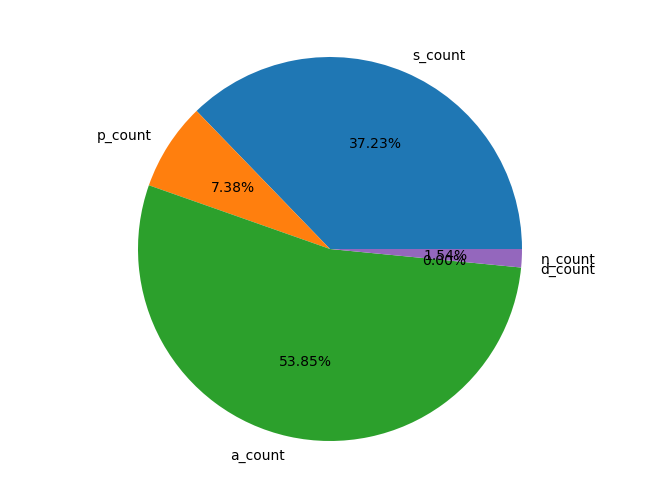

In [122]:
# Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
total_token_count = ['s_count', 'p_count', 'a_count','d_count','n_count']
data = [s_count, p_count, a_count,d_count,n_count]
ax.pie(data, labels = total_token_count,autopct='%1.2f%%')
plt.show()

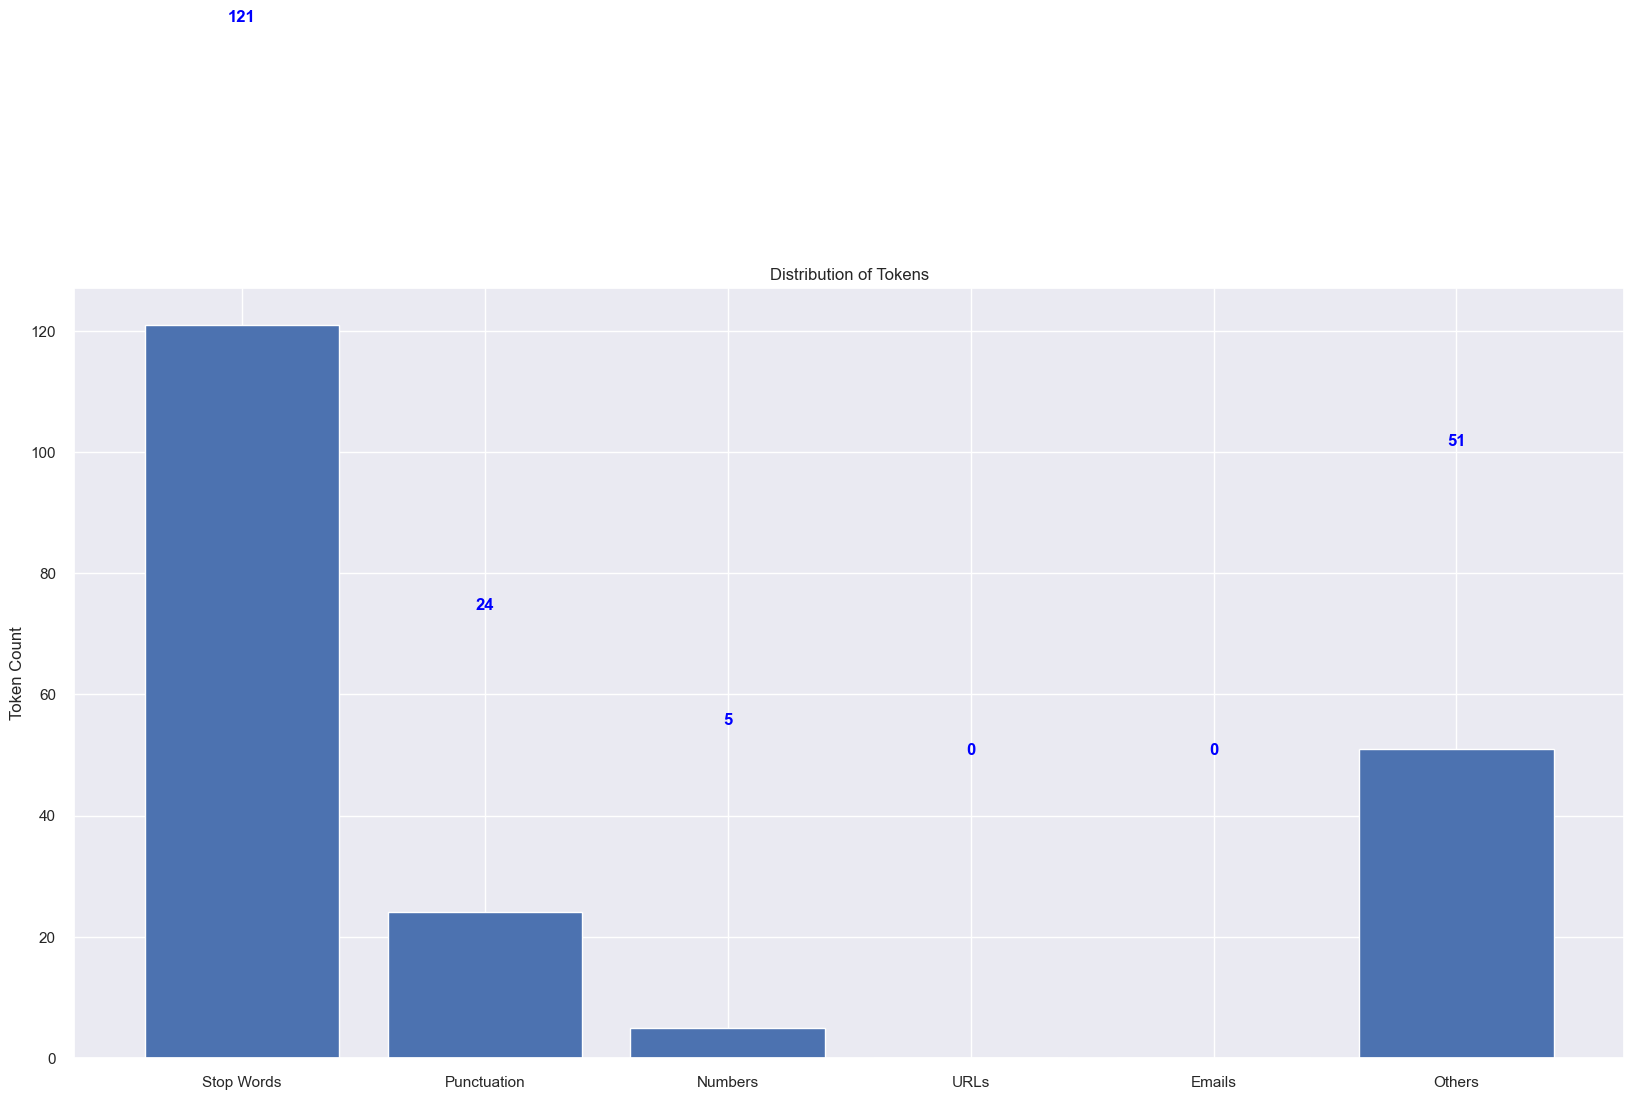

In [558]:
import matplotlib.pyplot as plt

total_token_count = ['Stop Words', 'Punctuation', 'Numbers', 'URLs', 'Emails', 'Others']
data = [s_count, p_count, n_count, url_count, email_count, token_count - (s_count + p_count + n_count + url_count + email_count)]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(total_token_count, data)
ax.set_ylabel('Token Count')
ax.set_title('Distribution of Tokens')

# Add number labels
for i, v in enumerate(data):
    ax.text(i, v + 50, str(v), color='blue', fontweight='bold', ha='center')

plt.show()

In [564]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
token_str = ' '.join(token for token in doc1)

# Create and generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(token_str)

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, spacy.tokens.token.Token found

In [559]:
# FORMING CLEANED DOC:

cleaned_doc=[token for token in doc1 if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and not token.like_email]

In [560]:
token_clean=0
for token in cleaned_doc:
    token_clean=token_clean+1
    print(token.text)

calculate
similarities
documents
sim
object
print
resulting
similarity
matrix
case
output
4x4
matrix
element
represents
cosine
similarity
documents
Note
MatrixSimilarity
similarity
measures
cosine
similarity
specifying
different
num_best
parameter
example
setting
num_best=1
return
document
highest
similarity
score


In [561]:
print("The length of cleaned doc is",token_clean)

The length of cleaned doc is 36


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


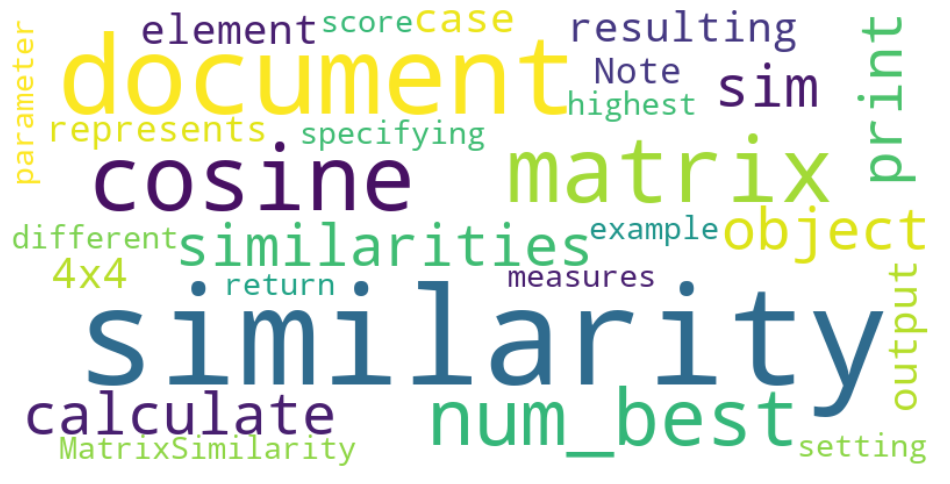

In [571]:
# assuming `cleaned_doc` is a list of spacy token objects
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([token.text for token in cleaned_doc]))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\pc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


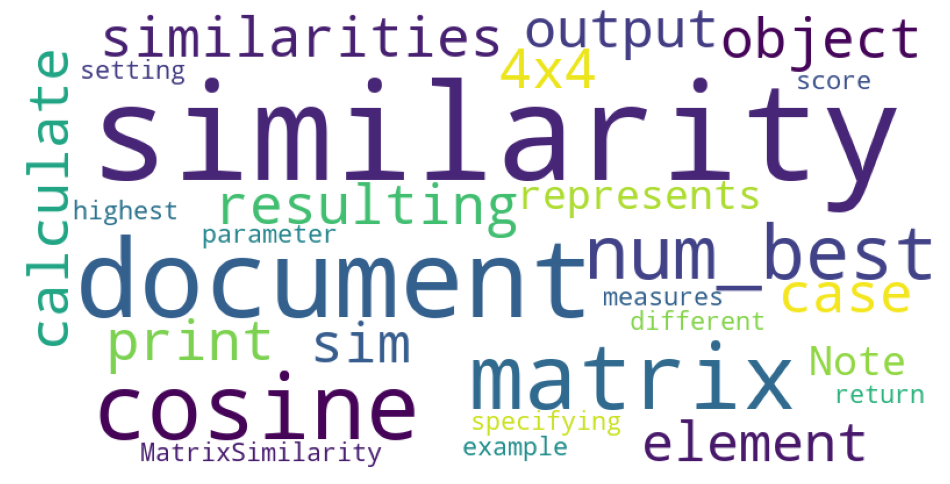

In [574]:
# assuming `preprocessed_text` is a list of preprocessed words
cleaned_doc_strings = [str(token) for token in cleaned_doc]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_doc_strings))

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## TAGGING:

POS tagging is the process of labeling each word in a text with its corresponding part of speech, such as noun, verb, adjective, etc. This information can be useful in a variety of natural language processing tasks, such as text classification, information retrieval, and machine translation. For example, in text classification, knowing the POS tags of words can help us identify which words are most important in distinguishing between different categories of text.

In addition to POS tagging, spaCy provides a wide range of other natural language processing capabilities, such as named entity recognition, dependency parsing, and text classification. By using these tools, we can gain a deeper understanding of the structure and meaning of natural language text, which can be useful in a wide range of applications.

### Parts of Speech-POS

In [123]:
for token in doc1:
    print(token,'==>',token.pos_)

India ==> PROPN
, ==> PUNCT
a ==> DET
South ==> ADJ
Asian ==> ADJ
nation ==> NOUN
, ==> PUNCT
is ==> AUX
the ==> DET
seventh ==> ADV
- ==> PUNCT
largest ==> ADJ
country ==> NOUN
by ==> ADP
area ==> NOUN
, ==> PUNCT
the ==> DET
second ==> ADV
- ==> PUNCT
most ==> ADV
populous ==> ADJ
country ==> NOUN
with ==> ADP
over ==> ADP
1.38 ==> NUM
billion ==> NUM
people ==> NOUN
, ==> PUNCT
and ==> CCONJ
the ==> DET
most ==> ADV
populous ==> ADJ
democracy ==> NOUN
in ==> ADP
the ==> DET
world ==> NOUN
. ==> PUNCT
India ==> PROPN
boasts ==> VERB
of ==> ADP
an ==> DET
immensely ==> ADV
rich ==> ADJ
cultural ==> ADJ
heritage ==> NOUN
, ==> PUNCT
including ==> VERB
numerous ==> ADJ
languages ==> NOUN
, ==> PUNCT
traditions ==> NOUN
, ==> PUNCT
and ==> CCONJ
people ==> NOUN
. ==> PUNCT
The ==> DET
country ==> NOUN
holds ==> VERB
its ==> PRON
uniqueness ==> NOUN
in ==> ADP
its ==> PRON
diversity ==> NOUN
, ==> PUNCT
and ==> CCONJ
hence ==> ADV
has ==> AUX
adapted ==> VERB
itself ==> PRON
to ==> ADP
in

In [124]:
spacy.explain('AUX')

'auxiliary'

In [169]:
# pos count:
pos_count=doc1.count_by(spacy.attrs.POS)
pos_count

{96: 3,
 97: 24,
 90: 20,
 84: 29,
 92: 48,
 87: 9,
 86: 9,
 85: 24,
 93: 4,
 89: 10,
 100: 12,
 95: 5,
 98: 3,
 94: 1}

In [171]:
for x,y in sorted(pos_count.items()):
    print(x,doc1.vocab[x].text,y)

84 ADJ 29
85 ADP 24
86 ADV 9
87 AUX 9
89 CCONJ 10
90 DET 20
92 NOUN 48
93 NUM 4
94 PART 1
95 PRON 5
96 PROPN 3
97 PUNCT 24
98 SCONJ 3
100 VERB 12


## Visualisation of POS

In [173]:
from spacy import displacy
displacy.render(doc1,style='dep') # Dependence

In [175]:
options={'compact':'True','color':'blue'}

displacy.render(doc1,style='dep',options=options)

In [125]:
## summary of token:

In [126]:
# Total number of tokens

token_count=0
stop_count=0
punct_count=0
num_count=0
stop_list = []
for token in doc1:
    token_count=token_count+1
    if token.is_stop:
        stop_count=stop_count+1
        stop_list.append(token.text)
    if token.is_punct:
        punct_count=punct_count+1
    if token.like_num:
        num_count=num_count+1
print(' The total number of tokens:',token_count)
print('Total number of stop words in the doc:',stop_count)
print(' The total number of puncuations in the doc:',punct_count)
print(' Count of numbers in the doc:',num_count)

 The total number of tokens: 201
Total number of stop words in the doc: 80
 The total number of puncuations in the doc: 24
 Count of numbers in the doc: 5


In [127]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(doc1):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[25:50]

text         lemma    pos  tag     dep is_alpha is_stop  \
25    billion    (billion,)    NUM   CD  nummod     True   False   
26     people     (people,)   NOUN  NNS    pobj     True   False   
27          ,          (,,)  PUNCT    ,   punct    False   False   
28        and        (and,)  CCONJ   CC      cc     True    True   
29        the        (the,)    DET   DT     det     True    True   
30       most       (most,)    ADV  RBS  advmod     True    True   
31   populous   (populous,)    ADJ   JJ    amod     True   False   
32  democracy  (democracy,)   NOUN   NN    conj     True   False   
33         in         (in,)    ADP   IN    prep     True    True   
34        the        (the,)    DET   DT     det     True    True   
35      world      (world,)   NOUN   NN    pobj     True   False   
36          .          (.,)  PUNCT    .   punct    False   False   
37      India      (India,)  PROPN  NNP   nsubj     True   False   
38     boasts      (boast,)   VERB  VBZ    ROOT     True   False   
39         of         (of,)    ADP   IN    prep     True    True   
40         an         (an,)    DET   DT     det     True    True   
41  immensely  (immensely,)    ADV   RB  advmod     True   False   
42       rich       (rich,)    ADJ   JJ    amod     True   False   
43   cultural   (cultural,)    ADJ   JJ    amod     True   False   
44   heritage   (heritage,)   NOUN   NN    pobj     True   False   
45          ,          (,,)  PUNCT    ,   punct    False   False   
46  including    (include,)   VERB  VBG    prep     True   False   
47   numerous   (numerous,)    ADJ   JJ    amod     True   False   
48  languages   (language,)   NOUN  NNS    pobj     True   False   
49          ,          (,,)  PUNCT    ,   punct    False   False   

   is_punctuation  
25          False  
26          False  
27           True  
28          False  
29          False  
30          False  
31          False  
32          False  
33          False  
34          False  
35          False  
36           True  
37          False  
38          False  
39          False  
40          False  
41          False  
42          False  
43          False  
44          False  
45           True  
46          False  
47          False  
48          False  
49           True

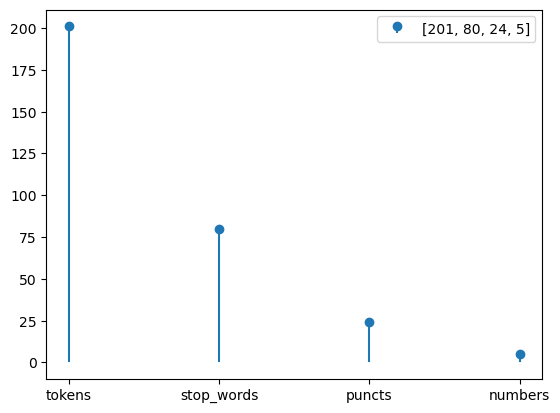

In [128]:
# visulaization of summary:
import matplotlib.pyplot as plt
figo,axeso = plt.subplots()
axeso.stem(['tokens','stop_words','puncts','numbers'], [token_count,stop_count,punct_count,num_count],
           label=[token_count,stop_count,punct_count,num_count],use_line_collection=True, basefmt=' ')
axeso.legend()
plt.show()

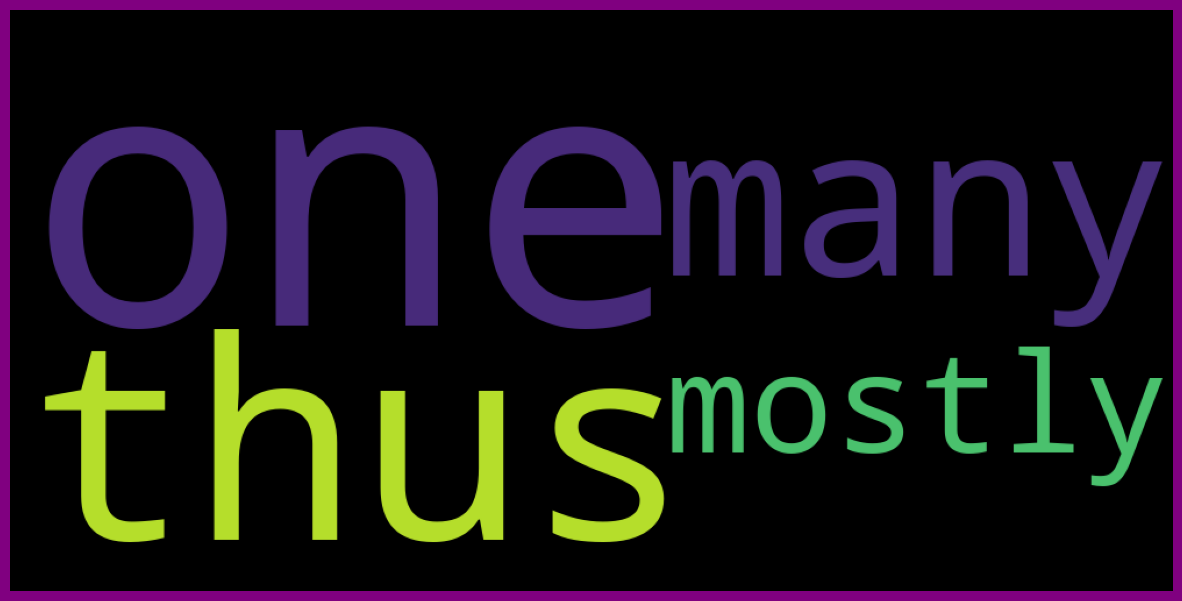

In [129]:
# Visualising - Most Common Stop Words:
from wordcloud import WordCloud
unique_string=(" ").join(stop_list)
unique_string = unique_string.lower()
wordcloud = WordCloud(width = 1000, height = 500, background_color ='black').generate(unique_string)
plt.figure(figsize=(15,8), facecolor = "purple")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [552]:
# EXTRA:
# LEMMATIZATION:

for token in doc1:
    print(token.text,'-',token.lemma_)

We - we
calculate - calculate
the - the
similarities - similarity
between - between
documents - document
using - use
the - the
sim - sim
object - object
and - and
print - print
the - the
resulting - result
similarity - similarity
matrix - matrix
. - .
In - in
this - this
case - case
, - ,
the - the
output - output
will - will
be - be
a - a
4x4 - 4x4
matrix - matrix
, - ,
where - where
each - each
element - element
represents - represent
the - the
cosine - cosine
similarity - similarity
between - between
two - two
documents - document
. - .
Note - note
that - that
MatrixSimilarity - MatrixSimilarity
can - can
be - be
used - use
with - with
other - other
similarity - similarity
measures - measure
besides - besides
cosine - cosine
similarity - similarity
by - by
specifying - specify
a - a
different - different
num_best - num_b
parameter - parameter
. - .
For - for
example - example
, - ,
setting - set
num_best=1 - num_best=1
will - will
return - return
the - the
document - document
with -

In [538]:
# EXTRA:
# Visualisation of POS:

#NOUN_COUNT

noun_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email :
        if token.pos_=='NOUN':
            noun_count=noun_count+1
            print(token.text,'====>',token.pos_)
            
# poS=VERB

verb_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='VERB':
            verb_count=verb_count+1
            print(token.text,'====>',token.pos_)
            
# poS=PROPN

propn_count=0

for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email  :
        if token.pos_=='PROPN':
            propn_count=propn_count+1
            print(token.text,'====>',token.pos_)
            
# poS=ADJ

adj_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADJ':
            adj_count=adj_count+1
            print(token.text,'====>',token.pos_)
print(' The count of tokens with PoS as ADJ:',adj_count)

# poS=ADV

adv_count=0
for token in doc1:
    if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email   :
        if token.pos_=='ADV':
            adv_count=adv_count+1
            print(token.text,'====>',token.pos_)

pos_dict={'noun':noun_count,'verb':verb_count,'propn':propn_count,'adj':adj_count,'adv':adv_count}


similarities ====> NOUN
documents ====> NOUN
object ====> NOUN
similarity ====> NOUN
matrix ====> NOUN
case ====> NOUN
output ====> NOUN
matrix ====> NOUN
element ====> NOUN
similarity ====> NOUN
documents ====> NOUN
similarity ====> NOUN
measures ====> NOUN
cosine ====> NOUN
similarity ====> NOUN
parameter ====> NOUN
example ====> NOUN
document ====> NOUN
similarity ====> NOUN
score ====> NOUN
calculate ====> VERB
print ====> VERB
resulting ====> VERB
represents ====> VERB
Note ====> VERB
specifying ====> VERB
setting ====> VERB
return ====> VERB
MatrixSimilarity ====> PROPN
num_best=1 ====> PROPN
sim ====> ADJ
cosine ====> ADJ
different ====> ADJ
num_best ====> ADJ
highest ====> ADJ
 The count of tokens with PoS as ADJ: 5


In [539]:
import pandas as pd
pos_series=pd.Series(pos_dict)
pos_series

noun     20
verb      8
propn     2
adj       5
adv       0
dtype: int64

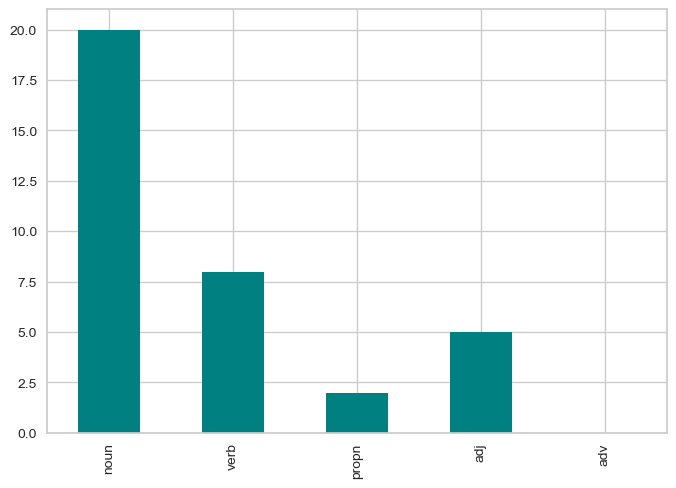

In [540]:
pos_series.plot(kind='bar',color='teal');

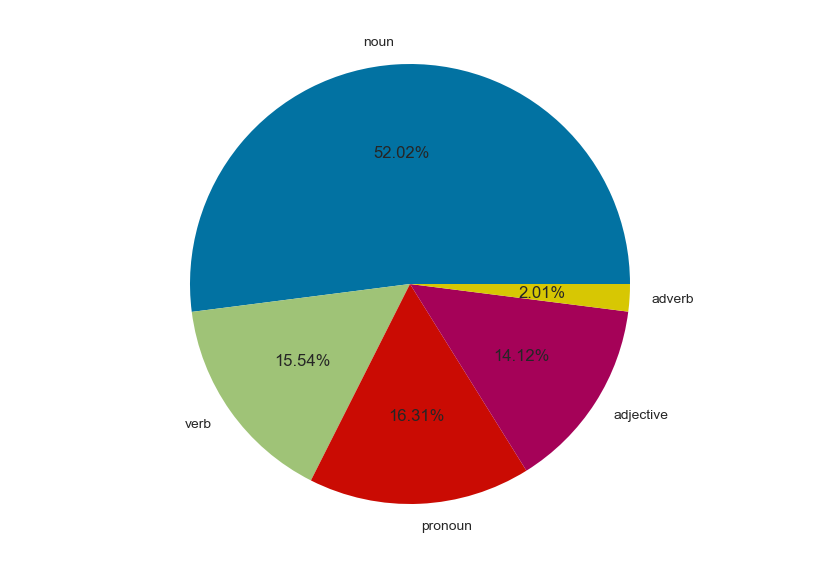

In [541]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pos = ['noun', 'verb', 'pronoun', 'adjective', 'adverb']
data = [1426,426,447,387,55]
ax.pie(data, labels = pos,autopct='%1.2f%%')
plt.show()

## STORE TOKEN IN A DATAFRAME

In [130]:
# Creating columns for the DF

cols=['Token','POS','Explain_POS','Tag','Explain_Tag']
cols

['Token', 'POS', 'Explain_POS', 'Tag', 'Explain_Tag']

In [131]:
rows=[]
for token in doc1:
    row=token,token.pos_,spacy.explain(token.pos_),token.tag_,spacy.explain(token.tag_)
    rows.append(row)
rows

[(India, 'PROPN', 'proper noun', 'NNP', 'noun, proper singular'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (a, 'DET', 'determiner', 'DT', 'determiner'),
 (South,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (Asian,
  'ADJ',
  'adjective',
  'JJ',
  'adjective (English), other noun-modifier (Chinese)'),
 (nation, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'punctuation', ',', 'punctuation mark, comma'),
 (is, 'AUX', 'auxiliary', 'VBZ', 'verb, 3rd person singular present'),
 (the, 'DET', 'determiner', 'DT', 'determiner'),
 (seventh, 'ADV', 'adverb', 'RB', 'adverb'),
 (-, 'PUNCT', 'punctuation', 'HYPH', 'punctuation mark, hyphen'),
 (largest, 'ADJ', 'adjective', 'JJS', 'adjective, superlative'),
 (country, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (by, 'ADP', 'adposition', 'IN', 'conjunction, subordinating or preposition'),
 (area, 'NOUN', 'noun', 'NN', 'noun, singular or mass'),
 (,, 'PUNCT', 'p

In [132]:
import pandas as pd
token_df=pd.DataFrame(rows,columns=cols)
token_df

Token    POS  Explain_POS  Tag  \
0       India  PROPN  proper noun  NNP   
1           ,  PUNCT  punctuation    ,   
2           a    DET   determiner   DT   
3       South    ADJ    adjective   JJ   
4       Asian    ADJ    adjective   JJ   
..        ...    ...          ...  ...   
196     ample    ADJ    adjective   JJ   
197    source   NOUN         noun   NN   
198        of    ADP   adposition   IN   
199  manpower   NOUN         noun   NN   
200         .  PUNCT  punctuation    .   

                                           Explain_Tag  
0                                noun, proper singular  
1                              punctuation mark, comma  
2                                           determiner  
3    adjective (English), other noun-modifier (Chin...  
4    adjective (English), other noun-modifier (Chin...  
..                                                 ...  
196  adjective (English), other noun-modifier (Chin...  
197                             noun, singular or mass  
198          conjunction, subordinating or preposition  
199                             noun, singular or mass  
200                  punctuation mark, sentence closer  

[201 rows x 5 columns]

In [133]:
token_df['POS'].value_counts()

NOUN     48
ADJ      29
PUNCT    24
ADP      24
DET      20
VERB     12
CCONJ    10
AUX       9
ADV       9
PRON      5
NUM       4
PROPN     3
SCONJ     3
PART      1
Name: POS, dtype: int64

## COnverting a text into a DF with tokens, pos 

In [184]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

In [185]:
token=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
token

[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'holiday']]

In [186]:
token=[]
pos=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'NOUN']]


In [187]:
# Updating text_df

text_df['Token']=token
text_df['POS']=pos

In [188]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

### SESSION 3

### Stream of strings as input

When there is a stream of strings as input, we need to 

use nlp.pipe() instead of nlp().

In [134]:
# List of strings:

In [135]:
text_2=['Today is Monday','Tomorrow is Tuesday',
       'Yesterday was a holiday']

In [136]:
type(text_2)

list

In [137]:
text_2[0]

'Today is Monday'

In [138]:
text_2[1]

'Tomorrow is Tuesday'

In [139]:
for sentence in nlp.pipe(text_2):
    print(sentence)

Today is Monday
Tomorrow is Tuesday
Yesterday was a holiday


In [140]:
# Tokens

for sentence in nlp.pipe(text_2):
    print(sentence)
    for token in sentence:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a holiday
Yesterday
was
a
holiday


In [141]:
# Tuple of strings

In [142]:
text_3=('Today is Monday','Tomorrow is Tuesday',
       'Yesterday was Sundaya,a holiday')

In [143]:
type(text_3)

tuple

In [144]:
text_3[0]

'Today is Monday'

In [145]:
for sent in nlp.pipe(text_3):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was Sundaya,a holiday
Yesterday
was
Sundaya
,
a
holiday


In [146]:
# List of tuples

In [147]:
text_4=[('Today is Monday'),('Tomorrow is Tuesday'),
       ('Yesterday was Sundaya,a holiday')]

In [148]:
type(text_4)

list

In [149]:
text_4[0]

'Today is Monday'

In [150]:
sent_count=0
for sent in nlp.pipe(text_4):
    sent_count=sent_count+1
    print(sent_count,'=>',sent)
    for token in sent:
        print(token)

1 => Today is Monday
Today
is
Monday
2 => Tomorrow is Tuesday
Tomorrow
is
Tuesday
3 => Yesterday was Sundaya,a holiday
Yesterday
was
Sundaya
,
a
holiday


### A DataFrame

In [151]:
text_2

['Today is Monday', 'Tomorrow is Tuesday', 'Yesterday was a holiday']

In [152]:
text_df=pd.DataFrame(text_2,columns=['Sentence'])
text_df

Sentence
0          Today is Monday
1      Tomorrow is Tuesday
2  Yesterday was a holiday

In [153]:
text_df['Sentence']

0            Today is Monday
1        Tomorrow is Tuesday
2    Yesterday was a holiday
Name: Sentence, dtype: object

In [154]:
for sent in nlp.pipe(text_df['Sentence']):
    print(sent)
    for token in sent:
        print(token)

Today is Monday
Today
is
Monday
Tomorrow is Tuesday
Tomorrow
is
Tuesday
Yesterday was a holiday
Yesterday
was
a
holiday


In [156]:
doc1

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

In [158]:
for token in doc1:
    print(token)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

## Separating doc into sentences

In [161]:
for sent in doc1.sents:
    print(sent)

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world.
India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people.
The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort.
While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills.
Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.
Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a

In [163]:
sent_count=0
for sent in doc1.sents:
    sent_count=sent_count+1
    print(sent_count,'==>',sent)

1 ==> India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world.
2 ==> India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people.
3 ==> The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort.
4 ==> While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills.
5 ==> Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.
6 ==> Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of 

## COnverting a text into a DF with tokens, pos 

In [189]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

In [190]:
token=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
token

[['Today', 'is', 'Monday'],
 ['Tomorrow', 'is', 'Tuesday'],
 ['Yesterday', 'was', 'a', 'holiday']]

In [191]:
token=[]
pos=[]
for sent in nlp.pipe(text_df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent] )
        pos.append([word.pos_ for word in sent])
print(token)
print(pos)

[['Today', 'is', 'Monday'], ['Tomorrow', 'is', 'Tuesday'], ['Yesterday', 'was', 'a', 'holiday']]
[['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'PROPN'], ['NOUN', 'AUX', 'DET', 'NOUN']]


In [192]:
# Updating text_df

text_df['Token']=token
text_df['POS']=pos

In [193]:
text_df

Sentence                         Token  \
0          Today is Monday           [Today, is, Monday]   
1      Tomorrow is Tuesday       [Tomorrow, is, Tuesday]   
2  Yesterday was a holiday  [Yesterday, was, a, holiday]   

                      POS  
0      [NOUN, AUX, PROPN]  
1      [NOUN, AUX, PROPN]  
2  [NOUN, AUX, DET, NOUN]

## SESSION 4

## Parser and NER

## Parser

Tries to find the dependence between the tokens.

A parser takes a sequence of words and assigns a syntactic structure to them according to a set of grammatical rules. The output of a parser is usually a tree or a graph that shows the relationships between the words in the sentence.

The main goal of a parser is to determine the grammatical structure of a sentence, which can be useful for various NLP tasks such as information extraction, text classification, and machine translation. A parser can also be used to identify the meaning of a sentence by analyzing its structure, as well as to generate new sentences that follow the same grammatical rules.

In [195]:
for token in doc1:
    print(token.text,'==>',token.dep_)

India ==> nsubj
, ==> punct
a ==> det
South ==> amod
Asian ==> amod
nation ==> appos
, ==> punct
is ==> ROOT
the ==> det
seventh ==> advmod
- ==> punct
largest ==> amod
country ==> attr
by ==> prep
area ==> pobj
, ==> punct
the ==> det
second ==> advmod
- ==> punct
most ==> advmod
populous ==> amod
country ==> appos
with ==> prep
over ==> quantmod
1.38 ==> compound
billion ==> nummod
people ==> pobj
, ==> punct
and ==> cc
the ==> det
most ==> advmod
populous ==> amod
democracy ==> conj
in ==> prep
the ==> det
world ==> pobj
. ==> punct
India ==> nsubj
boasts ==> ROOT
of ==> prep
an ==> det
immensely ==> advmod
rich ==> amod
cultural ==> amod
heritage ==> pobj
, ==> punct
including ==> prep
numerous ==> amod
languages ==> pobj
, ==> punct
traditions ==> conj
, ==> punct
and ==> cc
people ==> conj
. ==> punct
The ==> det
country ==> nsubj
holds ==> ROOT
its ==> poss
uniqueness ==> dobj
in ==> prep
its ==> poss
diversity ==> pobj
, ==> punct
and ==> cc
hence ==> advmod
has ==> aux
adapted

In [196]:
from spacy import displacy

displacy.render(doc1,style='dep')

In [197]:
spacy.explain('nsubj')

'nominal subject'

In [198]:
for token in doc1:
    print(token.text,'==>',token.head)

India ==> is
, ==> India
a ==> nation
South ==> Asian
Asian ==> nation
nation ==> India
, ==> India
is ==> is
the ==> country
seventh ==> largest
- ==> largest
largest ==> country
country ==> is
by ==> country
area ==> by
, ==> country
the ==> country
second ==> populous
- ==> most
most ==> populous
populous ==> country
country ==> country
with ==> country
over ==> billion
1.38 ==> billion
billion ==> people
people ==> with
, ==> country
and ==> country
the ==> democracy
most ==> populous
populous ==> democracy
democracy ==> country
in ==> democracy
the ==> world
world ==> in
. ==> is
India ==> boasts
boasts ==> boasts
of ==> boasts
an ==> heritage
immensely ==> rich
rich ==> heritage
cultural ==> heritage
heritage ==> of
, ==> heritage
including ==> heritage
numerous ==> languages
languages ==> including
, ==> languages
traditions ==> languages
, ==> traditions
and ==> traditions
people ==> traditions
. ==> boasts
The ==> country
country ==> holds
holds ==> holds
its ==> uniqueness
un

In [199]:
## Noun chunks

for chunk in doc1.noun_chunks:
    print(chunk.text, '==>',chunk.label_)

India ==> NP
a South Asian nation ==> NP
the seventh-largest country ==> NP
area ==> NP
the second-most populous country ==> NP
over 1.38 billion people ==> NP
the most populous democracy ==> NP
the world ==> NP
India ==> NP
an immensely rich cultural heritage ==> NP
numerous languages ==> NP
traditions ==> NP
people ==> NP
The country ==> NP
its uniqueness ==> NP
its diversity ==> NP
itself ==> NP
international changes ==> NP
poise ==> NP
comfort ==> NP
the economy ==> NP
international companies ==> NP
it ==> NP
open arms ==> NP
liberalisation ==> NP
Indians ==> NP
global approaches ==> NP
skills ==> NP
Indian villagers ==> NP
farming, advanced agriculture ==> NP
unique handicrafts ==> NP
their profession ==> NP
one hand ==> NP
the modern industries ==> NP
professional services sectors ==> NP
a big way ==> NP
the country ==> NP
many global majors ==> NP
strategic investments ==> NP
the presence ==> NP
a vast range ==> NP
industries ==> NP
investment avenues ==> NP
a supportive Governm

## NER: NAMED EMTITY RECOGNIZER

In [201]:
for token in doc1:
    print(token.text)

India
,
a
South
Asian
nation
,
is
the
seventh
-
largest
country
by
area
,
the
second
-
most
populous
country
with
over
1.38
billion
people
,
and
the
most
populous
democracy
in
the
world
.
India
boasts
of
an
immensely
rich
cultural
heritage
,
including
numerous
languages
,
traditions
,
and
people
.
The
country
holds
its
uniqueness
in
its
diversity
,
and
hence
has
adapted
itself
to
international
changes
with
poise
and
comfort
.
While
the
economy
has
welcomed
international
companies
to
invest
in
it
with
open
arms
since
liberalisation
in
the
1990s
,
Indians
have
been
prudent
and
proactive
in
adopting
global
approaches
and
skills
.
Indian
villagers
have
proudly
taken
up
farming
,
advanced
agriculture
and
unique
handicrafts
as
their
profession
on
one
hand
,
while
the
modern
industries
and
professional
services
sectors
are
coming
up
in
a
big
way
on
the
other
.
Thus
,
the
country
is
attracting
many
global
majors
for
strategic
investments
owing
to
the
presence
of
a
vast
range
of
industries
,
in

In [203]:
for ent in doc1.ents:
    print(ent.text,'==>',ent.label_)

India ==> GPE
South Asian ==> NORP
seventh ==> ORDINAL
second ==> ORDINAL
1.38 billion ==> CARDINAL
India ==> GPE
the 1990s ==> DATE
Indians ==> NORP
Indian ==> NORP


In [204]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [206]:
# List of entities

ent_list=[]
for ent in doc1.ents:
    ent_list.append(ent.label_)

In [207]:
print(ent_list)

['GPE', 'NORP', 'ORDINAL', 'ORDINAL', 'CARDINAL', 'GPE', 'DATE', 'NORP', 'NORP']


In [208]:
# List of tuples of text and the respective entities

for ent in doc1.ents:
    print(ent.text, ent.label_)

India GPE
South Asian NORP
seventh ORDINAL
second ORDINAL
1.38 billion CARDINAL
India GPE
the 1990s DATE
Indians NORP
Indian NORP


In [209]:
ent_list=[(ent.text,ent.label_) for ent in doc1.ents]

In [210]:
print(ent_list)

[('India', 'GPE'), ('South Asian', 'NORP'), ('seventh', 'ORDINAL'), ('second', 'ORDINAL'), ('1.38 billion', 'CARDINAL'), ('India', 'GPE'), ('the 1990s', 'DATE'), ('Indians', 'NORP'), ('Indian', 'NORP')]


#### OR

In [215]:
# LIST OF ENTITIES:

In [213]:
for ent in doc1.ents:
    print(ent.text,'==>',ent.label_)

India ==> GPE
South Asian ==> NORP
seventh ==> ORDINAL
second ==> ORDINAL
1.38 billion ==> CARDINAL
India ==> GPE
the 1990s ==> DATE
Indians ==> NORP
Indian ==> NORP


In [217]:
# COUNTING NUMBER OF ENTITIES:

ent_list=[]
for ent in doc1.ents:
    ent_list.append(ent.label_)
print(ent_list)

['GPE', 'NORP', 'ORDINAL', 'ORDINAL', 'CARDINAL', 'GPE', 'DATE', 'NORP', 'NORP']


In [218]:
from collections import Counter
Counter(ent_list)

Counter({'GPE': 2, 'NORP': 3, 'ORDINAL': 2, 'CARDINAL': 1, 'DATE': 1})

In [ ]:
# EXTRA: #############################

In [543]:
eco_ent_count=[ent.label_ for ent in doc.ents]
print(eco_ent_count)

['CARDINAL', 'CARDINAL', 'ORG']


In [544]:
entity_counts=Counter(eco_ent_count)
entity_counts_dict={}
for i in entity_counts.elements():
    entity_counts_dict[i]=entity_counts[i]
print(entity_counts_dict)

{'CARDINAL': 2, 'ORG': 1}


C:\Users\pc\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\pc\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='0', ylabel='1'>

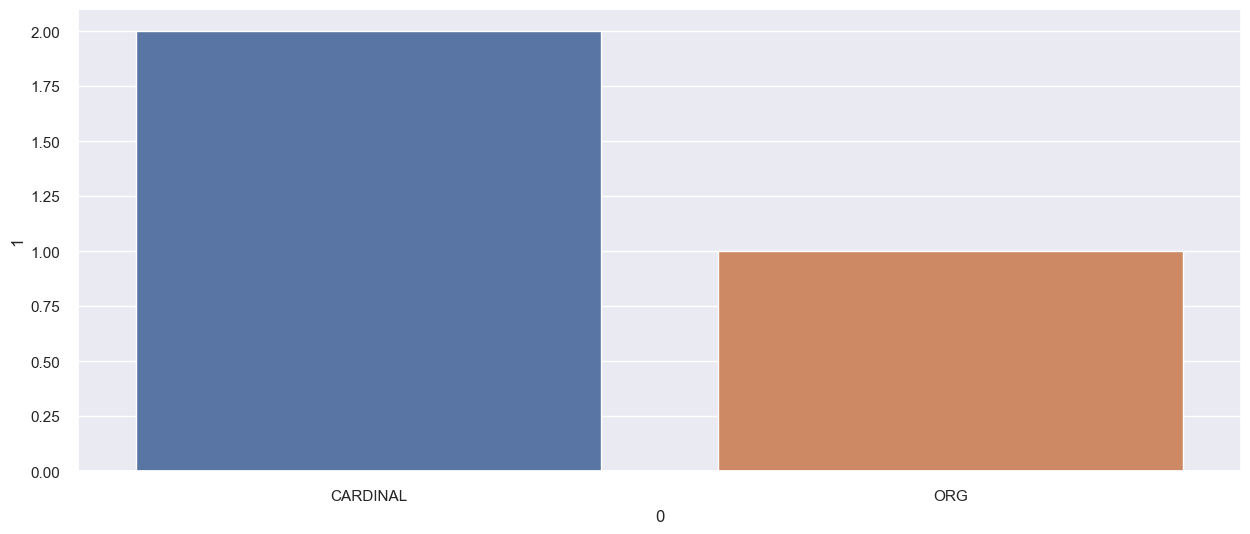

In [545]:
entity_df = pd.DataFrame(entity_counts_dict.items())
sns.set(rc = {'figure.figsize':(15,6)})
sns.barplot(data = entity_df,x=0,y=1)

In [ ]:
#########################

In [220]:
# Entities most appeared:

most_ent=[]
for ent in doc1.ents:
    most_ent.append(ent.text)
print(most_ent)

['India', 'South Asian', 'seventh', 'second', '1.38 billion', 'India', 'the 1990s', 'Indians', 'Indian']


In [221]:
# Most common

Counter(most_ent).most_common()

[('India', 2),
 ('South Asian', 1),
 ('seventh', 1),
 ('second', 1),
 ('1.38 billion', 1),
 ('the 1990s', 1),
 ('Indians', 1),
 ('Indian', 1)]

In [222]:
# most common 10 entities:
Counter(most_ent).most_common(10)

[('India', 2),
 ('South Asian', 1),
 ('seventh', 1),
 ('second', 1),
 ('1.38 billion', 1),
 ('the 1990s', 1),
 ('Indians', 1),
 ('Indian', 1)]

In [223]:
print(len(doc1.ents))

9


## VISUALISING NAMED ENTITIES

In [212]:
displacy.render(doc1, style='ent')

## NER FOR WEB DATA:

In [224]:
import requests

In [225]:
from bs4 import BeautifulSoup

In [226]:
url='https://en.wikipedia.org/wiki/India'

In [227]:
print(url)

https://en.wikipedia.org/wiki/India


In [228]:
request=requests.get(url)

In [229]:
print(request)

<Response [200]>


In [230]:
request=request.text
print(request)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>India - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-conte

In [231]:
soup_request=BeautifulSoup(request)
print(soup_request)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>India - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-conte

In [232]:
text= soup_request.body.text
print(text)


Jump to content









Main menu





Main menu
move to sidebar
hide



		Navigation
	

Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate




		Contribute
	

HelpLearn to editCommunity portalRecent changesUpload file




Languages

Language links are at the top of the page across from the title.



















Search















Create accountLog in






Personal tools




 Create account Log in




		Pages for logged out editors learn more


ContributionsTalk























Contents
move to sidebar
hide




(Top)





1Etymology







2History


				Toggle History subsection
			




2.1Ancient India







2.2Medieval India







2.3Early modern India







2.4Modern India









3Geography







4Biodiversity







5Politics and government


				Toggle Politics and government subsection
			




5.1Politics







5.2Government







5.3Administrative divisions





5.3.1States







5.3.2Union territories











6Foreign, eco

In [233]:
type(text)

str

### Converting the above str to document using NLP

In [234]:
doc3=nlp(text)

In [235]:
type(doc3)

spacy.tokens.doc.Doc

In [236]:
doc3


Jump to content









Main menu





Main menu
move to sidebar
hide



		Navigation
	

Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate




		Contribute
	

HelpLearn to editCommunity portalRecent changesUpload file




Languages

Language links are at the top of the page across from the title.



















Search















Create accountLog in






Personal tools




 Create account Log in




		Pages for logged out editors learn more


ContributionsTalk























Contents
move to sidebar
hide




(Top)





1Etymology







2History


				Toggle History subsection
			




2.1Ancient India







2.2Medieval India







2.3Early modern India







2.4Modern India









3Geography







4Biodiversity







5Politics and government


				Toggle Politics and government subsection
			




5.1Politics







5.2Government







5.3Administrative divisions





5.3.1States







5.3.2Union territories











6Foreign, eco

In [237]:
# NOW PERFORM TOKENIZER ALL STEPS:
# NOW PERFORM NER ALL STEPS FOR DOC 3

## SESSION 5

## Rule based matching

Rule-based matching is a technique in natural language processing (NLP) that allows you to find and extract specific patterns or phrases from text data. It involves defining a set of rules or patterns that match specific sequences of tokens (words, punctuation, etc.) in a document.

In [238]:
# AFTER PERFORMING: ALL THE ABOVE STEPS OF TOKENIZATION, TAGGER, NER, PARSING:

### Matching

  1) Token Matching 
  
  2) Phrase Matching
  
  3) Entity Matching

How ?

   1) Create an object/instance of the Matcher class.
   
   2) Define a pattern/rule.
   
   3) Add the pattern to the object
   
   4) Pass the document to the object

In [240]:
from spacy.matcher import Matcher

In [248]:
doc1

India, a South Asian nation, is the seventh-largest country by area, the second-most populous country with over 1.38 billion people, and the most populous democracy in the world. India boasts of an immensely rich cultural heritage, including numerous languages, traditions, and people. The country holds its uniqueness in its diversity, and hence has adapted itself to international changes with poise and comfort. While the economy has welcomed international companies to invest in it with open arms since liberalisation in the 1990s, Indians have been prudent and proactive in adopting global approaches and skills. Indian villagers have proudly taken up farming, advanced agriculture and unique handicrafts as their profession on one hand, while the modern industries and professional services sectors are coming up in a big way on the other.Thus, the country is attracting many global majors for strategic investments owing to the presence of a vast range of industries, investment avenues and a 

### Token matching

#### Occurance of text 'India'

In [241]:
# Create an instance of Matcher

matcher_1=Matcher(nlp.vocab)

In [249]:
# Define a pattern or a rule.

# A pattern is a list of dictionaries.

pattern_1=[{'text':'India'}]

In [250]:
# Add pattern to the object

matcher_1.add('Pattern1',[pattern_1])

In [251]:
# Pass the doc to the object

match_1= matcher_1(doc1)

In [252]:
print(len(match_1))

2


In [254]:
for match_id,start,end in match_1:
    span=doc1[start:end]
    print(span.text)

India
India


## Phrase matching

#### Occurance of 'country is'

In [256]:
matcher_2=Matcher(nlp.vocab)
pattern_2=[{'text':'country'},
          {'text':'is'}]
matcher_2.add('Pattern2',[pattern_2])
match_2=matcher_2(doc1)

In [257]:
print(len(match_2))

1


In [259]:
for match_id,start,end in match_2:
    span=doc1[start:end]
    print(span)

country is


### Occurances of language/s, model's

In [265]:
matcher_3=Matcher(nlp.vocab)
pattern_3=[{'LEMMA':'language'},
          {'LEMMA':'model'}]


matcher_3.add('Pattern3',[pattern_3])
match_3=matcher_3(doc1)

In [266]:
# How is lemma different from lemma?,
# LEMMA MEANS IT WILL SOW ALL POSSIBLE FORMS OF LANGUAGE LIKE LANGUAGE, LANGUAGES ETC.
# LEMMA: Will provide lemma root form for this this from the dictionary

In [267]:
print(len(match_3))

0


In [287]:
for match_id,start,end in match_3:
    span=doc1[start:end]
    print(span)

## Occurances of alphabets, digits 

In [270]:
matcher_4=Matcher(nlp.vocab)
pattern_4=[{'IS_ALPHA': True},
           {'IS_DIGIT':True}]


matcher_4.add('Pattern4',[pattern_4])
match_4=matcher_4(doc1)

In [271]:
print(len(match_4))

0


In [288]:
for match_id,start,end in match_4:
    span=doc1[start:end]
    print(span)

## Occurance of launch, discovery, find,,....

In [274]:
matcher_5=Matcher(nlp.vocab)
pattern_5=[{'LEMMA':
            {'IN':['launch','discover','find',
        'invent','create','develop','innovate',
                  'form','initiate']}}]

matcher_5.add('Pattern5',[pattern_5])
match_5=matcher_5(doc1)

In [275]:
# Print all lemmas of these words as placed in the dictionary format

In [276]:
print(len(match_5))

0


In [281]:
for match_id,start,end in match_5:
    span=doc1[start:end]
    print(span)

## Occurance of words of having length>15

In [282]:
# How many words are there witl words having length greater than 15?
# Will use matching in this
# Not directly asked

In [283]:
matcher_6=Matcher(nlp.vocab)
pattern_6=[{'LENGTH':{'>=':15}}]
matcher_6.add('Pattern6',[pattern_6])
match_6=matcher_6(doc1)

In [284]:
print(len(match_6))

0


In [286]:
for match_id,start,end in match_6:
    span=doc1[start:end]
    print(span)

## Words of length 2

In [290]:
matcher_7=Matcher(nlp.vocab)
pattern_7=[{'LENGTH':{'==':2}}]
matcher_7.add('Pattern7',[pattern_7])
match_7=matcher_7(doc1)

In [293]:
for match_id,start,end in match_7:
    span=doc1[start:end]
    print(span)

is
by
in
of
an
in
to
to
in
it
in
in
up
as
on
up
in
on
is
to
of
of
is
an
of


### Entity Matching

### Occurance of ent-type 'PERSON'

In [297]:
matcher_10=Matcher(nlp.vocab)
pattern_10=[{"ENT_TYPE":'PERSON'}]
matcher_10.add('Pattern10',[pattern_10])
match_10=matcher_10(doc1)

In [299]:
print(len(match_10))

0


In [300]:
for match_id,start,end in match_10:
    span=doc[start:end]
    print(span.text)

Refer: https://spacy.io/usage/rule-based-matching